In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

lenna = Image.open("Pictures/Lenna.png").convert('L')
lenna

transform = transforms.Compose([
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize((.5), (0.5))
])

lenna_tensor = transform(lenna).unsqueeze(0)
lenna_tensor.shape

torch.Size([1, 1, 244, 244])

In [6]:
class PrewittCNN(nn.Module):
    def __init__(self):
        super(PrewittCNN, self).__init__()
        
        prewitt_tensor = torch.Tensor([
            [[[-1, -1, -1], [0, 0, 0], [1, 1, 1]]],
            [[[1, 0, -1], [1, 0, -1], [1, 0, -1]]]
        ])
        
        
        self.conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1, bias=False)
        self.conv.weight.data = prewitt_tensor
        
    
    def forward(self, x):
        x = self.conv(x)
        return x

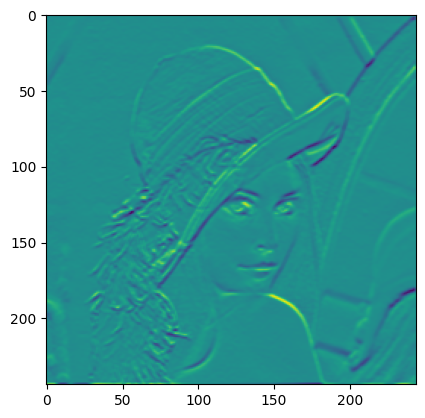

In [7]:
prewitt_net = PrewittCNN()

with torch.no_grad():
    output = prewitt_net(lenna_tensor)
    
import matplotlib.pyplot as plt
import numpy as np

feature_map = output[0, 0].detach().numpy()

# Normalizando o mapa de características
feature_map -= feature_map.min()
feature_map /= feature_map.max()

# Gerando um mapa de calor
heatmap = np.uint8(255 * feature_map)

# Visualizando o mapa de calor
plt.imshow(heatmap)
plt.show()